<a href="https://colab.research.google.com/github/santheipman/CS112.L11.KHTN/blob/master/EXCERCISE/WEEK_01/BOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài tập #1: BOT

## **Nhóm N005**

| Thành viên     | MSSV |
| ----------- | ----------- |
| Vũ Quí San (Nhóm trưởng)        | 18520143 |
| Phạm Mạnh Tiến     | 18520166 |
| Nguyễn Vương Thịnh | 18520367 |

## Đề bài

**BOT** (*Built-Operation-Transfer*, có nghĩa: Xây dựng-Vận hành-Chuyển giao) là hình thức Chính phủ kêu gọi các công ty bỏ vốn xây dựng trước (*Built*) thông qua đấu thầu, sau đó khai thác vận hành một thời gian (*Operation*) và sau cùng là chuyển giao (*Transfer*) lại cho nhà nước sở tại.

Đường cao tốc xuyên quốc gia được xây dựng theo hình thức BOT. Công ty Đa quốc gia *Modern Highway* trúng thầu, chia toàn bộ con đường thành $\mathbf{n}$ đoạn. Theo tính toán của Công ty sau khi chuyển giao con đường cho chính phủ sở tại quản lý thì lãi thu được ở đoạn đường thứ $\mathbf{i}$ là $\mathbf{a_i}$, $\mathbf{a_i}$ có thể dương, âm hoặc bằng 0, tức là với từng đoạn con có thể lãi, lỗ hoặc hòa vốn. Từng nhóm các đoạn đường liên tiếp nhau (gọi tắt là khoảng) được chia cho các công ty con thực hiện. Công ty con *ASEAM Highway* hiện đang có trụ sở ở nước sở tại được quyền chọn trước khoảng tùy ý (có thể là cả con đường).

Dĩ nhiên Ban Giám đốc *ASEAM Highway* muốn chọn khoảng bắt đầu từ đoạn $\mathbf{p}$ đến hết đoạn $\mathbf{q}$ mang lại lợi nhuận cao nhất hoặc lỗ ít nhất nếu không có khoảng nào cho lãi.

Hãy chỉ ra khoảng cần chọn và lãi thu được. Nếu có nhiều cách chọn thì chỉ ra cách chọn có $\mathbf{p}$ nhỏ nhất.

***Dữ liệu:*** Vào từ thiết bị nhập chuẩn:
- Dòng đầu tiên chứa số nguyên $\mathbf{n}$ (1 ≤ $\mathbf{n}$ ≤ $10^{6}$),
- Dòng thứ 2 chứa n số nguyên $\mathbf{a_1}$, $\mathbf{a_2}$, . . ., $\mathbf{a_n}$ (0 ≤ |$\mathbf{a_i}$| ≤ $10^{9}$, $\mathbf{i}$ = 1 ÷ $\mathbf{n}$).

***Kết quả:*** Đưa ra thiết bị xuất chuẩn trên một dòng 2 số nguyên p, q và lãi thu được

***Ví dụ:***

| INPUT | OUTPUT |
| :--- | :----------- |
| 16<br>2 -4 5 -8 4 -1 -1 1 1 1 -2 2 4 -6 9 -4 | 5 15 12 |

## 1. Tóm tắt bài toán
Tìm đoạn từ $p$ đến $q$ trong dãy $a_1, a_2, ... , a_n$ có tổng các phần tử là lớn nhất.

## 2. Kỹ thuật áp dụng

**Tổng tiền tố**

Kỹ thuật tổng tiền tố xây dựng mảng $f$ với mỗi phần tử được định nghĩa như sau:
$f_i = \sum_{j=1}^{i} a_i$

Từ đó ta có thể tính được tổng các phần tử của đoạn từ $p$ đến $q$ với công thức: $S_{pq} = f_p - f_{q-1}$

Trong cài đặt thực ra ta chỉ cần hai biến `fi` và `f_min` (sẽ giải thích kĩ hơn ở bên dưới) để lưu hai giá trị thay vì tạo mảng để lưu tất cả giá trị $f_i$.

## 3. Thuật toán

**Ý tưởng**

- $S_{max}$ là tổng của đoạn có tổng lớn nhất trong dãy $a$ (tổng cần tìm).
- $S_i$ là tổng của đoạn kết thúc tại vị trí $i$ có tổng lớn nhất.
- Khi đó ta có thể tính được $S_{max}$ theo công thức sau:

\begin{align}
S_{max} = max(S_1, S_2, ... , S_n)
\end{align}

- Cách tính $S_i$: tổng của đoạn kết thúc tại vị trí $i$ có dạng $f_i - f_{j}$, với $j<i$. Vì vậy để tổng đó lớn nhất thì ta phải tìm $f_j$ nhỏ nhất, ta gọi giá trị nhỏ nhất này là $f_{min}$.

Tóm lại để giải bài toán này ta sẽ duyệt từ đầu đến cuối dãy $a$, tại mỗi lần lặp ta thực hiện: 
- Tính $f_i$ = $f_{i-1} + a_i$
- Nếu $f_i < f_{min}$ thì cập nhật $f_{min} = f_i$
- Tính $S_i = f_i - f_{min}$
- Nếu $S_i > S_{max}$ thì cập nhật $S_{max} = S_i$, đồng thời cập nhật các giá trị $p$, $q$

*Độ phức tạp của thuật toán là $O(n)$.*

**Mã giả thuật toán**

```pseudocode
initialize variables

for i = 1 to n:
    fi = fi + a[i]
    if fi < f_min:
        update fi = f_min
    if fi - f_min > S_max:
        update S_max, p, q
```

## 4. Cài đặt

Tên biến trong code:
- `S_max`: $S_{max}$
- `fi`: $f_i$
- `f_min`: $f_{min}$
- `p`, `p_temp`: vị trí bắt đầu của đoạn có tổng $S_{max}$ (`p_temp` để lưu giá trị tạm).
- `q`: vị trí kết thúc của đoạn có tổng $S_{max}$
- `MAX_VAL`: giá trị lớn nhất trong miền giá trị của phần tử thuộc $a$.

In [ ]:
MAX_VAL = 1e9

def find_max_sum(a):
    """
    Hàm tìm đoạn từ p đến q trong dãy a có tổng các phần tử là lớn nhất
    
    Đối số:
    a -- dãy a từ input
    
    Kết quả trả về:
    p -- vị trí bắt đầu của đoạn có tổng lớn nhất trong dãy a
    q -- vị trí kết thúc của đoạn có tổng lớn nhất trong dãy a
    S_max -- tổng của đoạn có tổng lớn nhất trong dãy a
    """
    
    # Khởi tạo giá trị cho các biến
    fi = 0 
    f_min = MAX_VAL
    S_max = - MAX_VAL
    p = q = p_tmp = 0

    # Duyệt qua từng a[i] để tính fi, kiểm tra và cập nhật f_min, S_max, p, q
    for i in range(len(a)):

        fi = fi + a[i]

        if fi < f_min:
            f_min = fi
            p_tmp = i
    
        if fi - f_min > S_max:
            S_max = fi - f_min
            p = p_tmp
            q = i

    # giải quyết trường hợp p==q==1 
    if p == q:
        S_max = a[1] # phần tử đầu tiên của dãy a (tại vì ta phần tử a[0] là phần tử ta thêm vào
                     # nên phần tử đầu thứ nhất của a trở thành a[1])
    else:
        p = p + 1

    return p, q, S_max

    
# nhập input
input()
st = input()
a = [int(x) for x in st.split()]

# tìm và in kết quả
p, q, S_max = find_max_sum([0] + a) # thêm phần tử 0 vào đầu dãy a để thuận tiện cho việc tính toán
                                    # mà không làm thay đổi kết quả
print(p, q, S_max)

16
2 -4 5 -8 4 -1 -1 1 1 1 -2 2 4 -6 9 -4
5 15 12


## 5. Kết quả trên Wecode

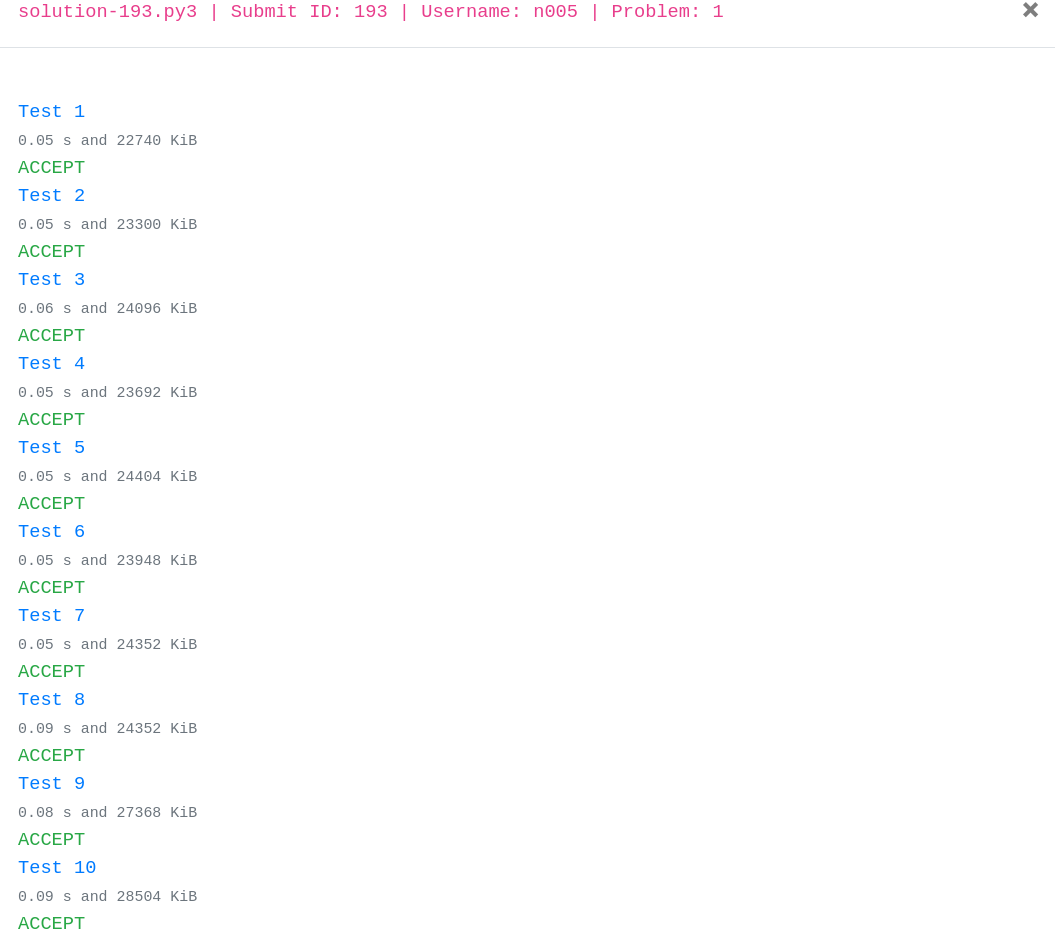